Mounted at /content/drive
Loading network...
Network loaded!
Computing metrics...


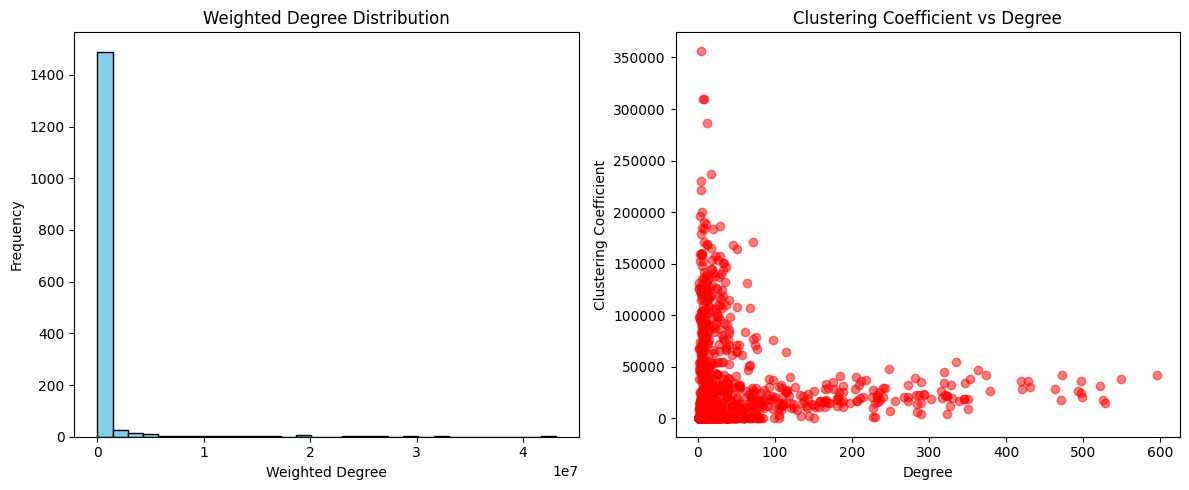


Network Statistics:
Number of nodes: 1574
Average weighted degree: 503017.84
Average clustering coefficient: 22327.4502


In [2]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import urllib.request as u

class N:  # Network
    def __init__(s):
        s.n = set()  # nodes
        s.e = {}     # edges
        s.a = {}     # adjacency list

    def add(s, i, j, w):  # add edge (i,j) with weight w
        s.n.add(i)
        s.n.add(j)

        if i not in s.e: s.e[i] = {}
        if j not in s.e: s.e[j] = {}

        s.e[i][j] = w
        s.e[j][i] = w

        if i not in s.a: s.a[i] = []
        if j not in s.a: s.a[j] = []

        s.a[i].append(j)
        s.a[j].append(i)

    def w(s, i):  # weighted degree of node i
        return sum(s.e[i].values()) if i in s.e else 0

    def d(s, i):  # degree of node i
        return len(s.a[i]) if i in s.a else 0

    def c(s, i):  # clustering coefficient of node i
        if i not in s.a: return 0

        v = s.a[i]  # neighbors
        if len(v) < 2: return 0

        p = len(v) * (len(v) - 1) / 2  # possible triangles
        if p == 0: return 0

        t = 0  # actual triangles
        for x in range(len(v)):
            for y in range(x + 1, len(v)):
                if v[y] in s.a[v[x]]:
                    w1 = s.e[i][v[x]]
                    w2 = s.e[i][v[y]]
                    w3 = s.e[v[x]][v[y]]
                    t += (w1 + w2 + w3) / 3
        return t / p

def load(l):  # load network from URL
    g = N()  # graph
    f = l.split('/')[-2]  # file id
    r = u.urlopen(f"https://drive.google.com/uc?id={f}")
    d = r.read().decode('utf-8')

    for x in d.splitlines():
        if x and not x.startswith('#'):
            try:
                i, j, w = map(float, x.strip().split())
                g.add(int(i), int(j), w)
            except:
                continue
    return g

# URL of dataset
l = "https://drive.google.com/file/d/1k9shqEUbTg1tL3-YOvtLrtlVF3Bqnr9-/view?usp=sharing"

print("Loading network...")
g = load(l)
print("Network loaded!")

# Calculate weighted degrees and clustering coefficients
print("Computing metrics...")
w = [g.w(n) for n in g.n]  # weighted degrees
d = [g.d(n) for n in g.n]  # degrees
c = [g.c(n) for n in g.n]  # clustering coefficients

# Plot 1: Weighted Degree Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(w, bins=30, edgecolor='black', color='skyblue')
plt.title('Weighted Degree Distribution')
plt.xlabel('Weighted Degree')
plt.ylabel('Frequency')

# Plot 2: Clustering vs Degree
plt.subplot(1, 2, 2)
plt.scatter(d, c, alpha=0.5, color='red')
plt.title('Clustering Coefficient vs Degree')
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')

plt.tight_layout()
plt.show()

# Save plots
plt.figure(figsize=(10, 6))
plt.hist(w, bins=30, edgecolor='black', color='skyblue')
plt.title('Weighted Degree Distribution')
plt.xlabel('Weighted Degree')
plt.ylabel('Frequency')
plt.savefig('w_dist.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.scatter(d, c, alpha=0.5, color='red')
plt.title('Clustering Coefficient vs Degree')
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.savefig('c_vs_d.png')
plt.close()

print("\nNetwork Statistics:")
print(f"Number of nodes: {len(g.n)}")
print(f"Average weighted degree: {sum(w)/len(w):.2f}")
print(f"Average clustering coefficient: {sum(c)/len(c):.4f}")